In [62]:
import numpy as np

A = np.array([[-2000, 999.75],[1, -1]])
b = np.array([1000.25,0])

def f(x):
    return A@x + b

x0 = np.array([0,-2])

def s(t):
    return np.array([-1.499875*np.exp(-0.5*t)+0.499875*np.exp(-2000.5*t)+1,-2.99975*np.exp(-0.5*t)-0.00025*np.exp(-2000.5*t)+1])

def u(t):
    temp = s(t)
    return temp[0]

# classical RK4
def cl_rk4(x0, t0, tn, n):
    cl_rk4_u_n = [x0[0]]
    cl_rk4_v_n = [x0[1]]
    h = tn / n
    print('\n'+'='*15+'classical_rk4'+'='*15)   
    print('-'*43)
    print('step(n) u_n v_n u(t_n) v(t_n)')
    print('-'*43)
    print('\n{:.1f} {:.6f} {:.6f} {:.6f} {:.6f}'.format(0, x0[0], x0[1], s(0)[0], s(0)[1]))
    for i in range(n):
        k1 = f(x0)
        k2 = f(x0+h*k1/2)
        k3 = f(x0+h*k2/2)
        k4 = f(x0+h*k3)
        k = k1/6 + k2/3 + k3/3 + k4/6
        xn = x0 + h*k
        x0 = xn
        t0 += h
        if i != 0:
            cl_rk4_u_n.append(xn[0])
            cl_rk4_v_n.append(xn[1])
        if i%(n/20) == 0 and i != 0:
            print('\n{:.1f} {:.6f} {:.6f} {:.6f} {:.6f}'.format(t0, xn[0], xn[1], s(t0)[0], s(t0)[1]))
    return cl_rk4_u_n, cl_rk4_v_n

# implicit RK4
def im_rk4(x0, t0, tn, n):
    im_rk4_u_n = [x0[0]]
    im_rk4_v_n = [x0[1]]
    h = tn / n
    print('\n'+'='*15+'implicit_rk4'+'='*15)   
    print('-'*42)
    print('step(n) u_n v_n u(t_n) v(t_n)')
    print('-'*42)
    print('\n{:.1f} {:.6f} {:.6f} {:.6f} {:.6f}'.format(0, x0[0], x0[1], s(0)[0], s(0)[1]))
    xn = x0
    for i in range(n):
        B = np.eye(2)-(1/4 + np.sqrt(3)/6)*h*A@np.linalg.pinv(np.eye(2)+(np.sqrt(3)/6)*h*A, rcond = 1e-5)@(np.eye(2)-(np.sqrt(3)/6*h*A))
        K2 = np.linalg.pinv(B, rcond = 1e-5)@(A@xn + b)
        K1 = np.linalg.pinv(np.eye(2)+(np.sqrt(3)/6)*h*A, rcond = 1e-5)@(np.eye(2)-(np.sqrt(3)/6)*h*A)@K2
        xn = x0 + (h/2)*(K1+K2)
        x0 = xn
        t0 += h
        if i != 0:
            im_rk4_u_n.append(xn[0])
            im_rk4_v_n.append(xn[1])
        if i%(n/20) == 0 and i != 0:
            print('\n{:.1f} {:.6f} {:.6f} {:.6f} {:.6f}'.format(t0, xn[0], xn[1], s(t0)[0], s(t0)[1]))
    return im_rk4_u_n, im_rk4_v_n

In [63]:
cl_rk4_u_n, cl_rk4_v_n = cl_rk4(x0, 0, 20, 20000)
im_rk4_u_n, im_rk4_v_n = im_rk4(x0, 0, 20, 20000)


===============classical_rk4===============
-------------------------------------------
step(n) u_n v_n u(t_n) v(t_n)
-------------------------------------------

0.0 0.000000 -2.000000 0.000000 -2.000000

1.0 0.090735 -0.818531 0.090735 -0.818531

2.0 0.448503 -0.102995 0.448503 -0.102995

3.0 0.665500 0.331000 0.665500 0.331000

4.0 0.797115 0.594231 0.797115 0.594231

5.0 0.876944 0.753889 0.876944 0.753889

6.0 0.925363 0.850726 0.925363 0.850726

7.0 0.954730 0.909461 0.954730 0.909461

8.0 0.972543 0.945085 0.972543 0.945085

9.0 0.983346 0.966692 0.983346 0.966692

10.0 0.989899 0.979798 0.989899 0.979798

11.0 0.993873 0.987747 0.993873 0.987747

12.0 0.996284 0.992568 0.996284 0.992568

13.0 0.997746 0.995492 0.997746 0.995492

14.0 0.998633 0.997266 0.998633 0.997266

15.0 0.999171 0.998342 0.999171 0.998342

16.0 0.999497 0.998994 0.999497 0.998994

17.0 0.999695 0.999390 0.999695 0.999390

18.0 0.999815 0.999630 0.999815 0.999630

19.0 0.999888 0.999776 0.999888 0.999776



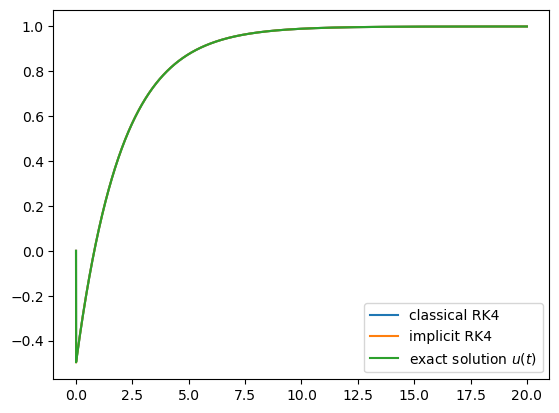

In [64]:
import matplotlib.pyplot as plt
tlist = np.arange(0,20,20/20000)
ut_ex = [s(t)[0] for t in tlist]
plt.plot(tlist, cl_rk4_u_n, label = "classical RK4")
plt.plot(tlist, im_rk4_u_n, label = "implicit RK4")
plt.plot(tlist, ut_ex, label = "exact solution $u(t)$")
plt.legend()
plt.show()

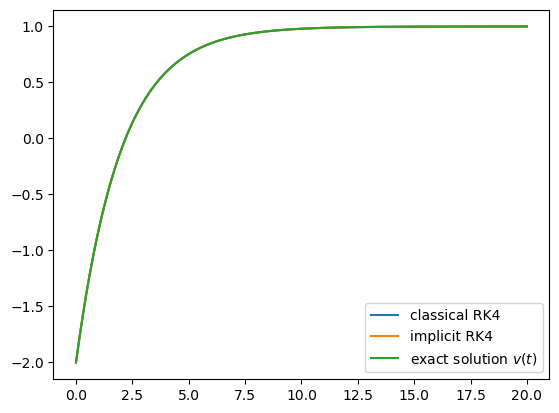

In [65]:
vt_ex = [s(t)[1] for t in tlist]
plt.plot(tlist, cl_rk4_v_n, label = "classical RK4")
plt.plot(tlist, im_rk4_v_n, label = "implicit RK4")
plt.plot(tlist, vt_ex, label = "exact solution $v(t)$")
plt.legend()
plt.show()